# Monopolos e dipolos

In [1]:
# for interactive plots
#%matplotlib notebook

# for static plots
%matplotlib inline

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def g_field(x, y, z, sources, mass, tol=1e-15):
    
    # verify the input
    assert x.shape == y.shape == z.shape, 'x, y, z must have the same shape'
    assert (sources.ndim == 2) and (sources.shape[1] == 3), 'sources must be a matrix with 3 columns'
    assert (mass.ndim == 1) and (mass.size == sources.shape[0]), 'number of mass elements and \
sources rows must be the same'
    
    # create arrays for computing the field components
    gx = np.zeros_like(x)
    gy = np.zeros_like(x)
    gz = np.zeros_like(x)
    
    # iterate over the sources
    for s, p in zip(sources, mass):
        
        # coordinates of the source
        x0, y0, z0 = s
        
        # new coordinates with origin at the source
        X = x - x0
        Y = y - y0
        Z = z - z0
        R2 = X*X + Y*Y + Z*Z
        
        # avoid singularity
        safe_points = (R2 >= tol**2)
        
        # compute the field components only at the safe points
        R3 = R2[safe_points]*np.sqrt(R2[safe_points])
        gx[safe_points] += p*(-X[safe_points]/R3)
        gy[safe_points] += p*(-Y[safe_points]/R3)
        gz[safe_points] += p*(-Z[safe_points]/R3)

    return gx, gy, gz

In [4]:
def E_field(x, y, z, sources, Q, tol=1e-15):
    
    # verify the input
    assert x.shape == y.shape == z.shape, 'x, y, z must have the same shape'
    assert (sources.ndim == 2) and (sources.shape[1] == 3), 'sources must be a matrix with 3 columns'
    assert (Q.ndim == 1) and (Q.size == sources.shape[0]), 'number of Q elements and \
sources rows must be the same'
    
    # create arrays for computing the field components
    Ex = np.zeros_like(x)
    Ey = np.zeros_like(x)
    Ez = np.zeros_like(x)
    
    # iterate over the sources
    for s, q in zip(sources, Q):
        
        # coordinates of the source
        x0, y0, z0 = s
        
        # new coordinates with origin at the source
        X = x - x0
        Y = y - y0
        Z = z - z0
        R2 = X*X + Y*Y + Z*Z
        
        # avoid singularity
        safe_points = (R2 >= tol**2)
        
        # compute the field components only at the safe points
        R3 = R2[safe_points]*np.sqrt(R2[safe_points])
        Ex[safe_points] += -q*(-X[safe_points]/R3)
        Ey[safe_points] += -q*(-Y[safe_points]/R3)
        Ez[safe_points] += -q*(-Z[safe_points]/R3)

    return Ex, Ey, Ez

In [5]:
def B_field(x, y, z, sources, moment, tol=1e-15):
    
    # verify the input
    assert x.shape == y.shape == z.shape, 'x, y, z must have the same shape'
    assert (sources.ndim == 2) and (sources.shape[1] == 3), 'sources must be a matrix with 3 columns'
    assert (moment.shape == sources.shape), 'moment and sources must have the same shape'
    
    # create arrays for computing the field components
    Bx = np.zeros_like(x)
    By = np.zeros_like(x)
    Bz = np.zeros_like(x)
    
    # iterate over the sources
    for s, m in zip(sources, moment):
        
        # coordinates of the source
        x0, y0, z0 = s
        
        # components of the moment
        mx, my, mz = m
        
        # new coordinates with origin at the source
        X = x - x0
        Y = y - y0
        Z = z - z0
        R2 = X*X + Y*Y + Z*Z
        
        # avoid singularity
        safe_points = (R2 >= tol**2)
        
        # compute the field components only at the safe points
        R3 = R2[safe_points]*np.sqrt(R2[safe_points])
        R5 = R2[safe_points]*R3
        
        xx = (3*X[safe_points]*X[safe_points])/R5 - 1/R3
        xy = (3*X[safe_points]*Y[safe_points])/R5
        xz = (3*X[safe_points]*Z[safe_points])/R5
        yy = (3*Y[safe_points]*Y[safe_points])/R5 - 1/R3
        yz = (3*Y[safe_points]*Z[safe_points])/R5
        zz = (3*Z[safe_points]*Z[safe_points])/R5 - 1/R3
        
        Bx[safe_points] += mx*xx + my*xy + mz*xz
        By[safe_points] += mx*xy + my*yy + mz*yz
        Bz[safe_points] += mx*xz + my*yz + mz*zz

    return Bx, By, Bz

In [6]:
def Gradg_field(x, y, z, sources, mass, tol=1e-15):
    
    # verify the input
    assert x.shape == y.shape == z.shape, 'x, y, z must have the same shape'
    assert (sources.ndim == 2) and (sources.shape[1] == 3), 'sources must be a matrix with 3 columns'
    assert (mass.ndim == 1) and (mass.size == sources.shape[0]), 'number of mass elements and \
sources rows must be the same'
    
    # create arrays for computing the field components
    gxx = np.zeros_like(x)
    gxy = np.zeros_like(x)
    gxz = np.zeros_like(x)
    
    gyy = np.zeros_like(x)
    gyz = np.zeros_like(x)
    gzz = np.zeros_like(x)
    
    # iterate over the sources
    for s, p in zip(sources, mass):
        
        # coordinates of the source
        x0, y0, z0 = s
        
        
        # new coordinates with origin at the source
        X = x - x0
        Y = y - y0
        Z = z - z0
        R2 = X*X + Y*Y + Z*Z
        
        # avoid singularity
        safe_points = (R2 >= tol**2)
        
        # compute the field components only at the safe points
        R3 = R2[safe_points]*np.sqrt(R2[safe_points])
        R5 = R2[safe_points]*R3
        
        gxx[safe_points] += p*(3*X[safe_points]*X[safe_points])/R5 - 1/R3
        gxy[safe_points] += p*(3*X[safe_points]*Y[safe_points])/R5
        gxz[safe_points] += p*(3*X[safe_points]*Z[safe_points])/R5
        gyy[safe_points] += p*(3*Y[safe_points]*Y[safe_points])/R5 - 1/R3
        gyz[safe_points] += p*(3*Y[safe_points]*Z[safe_points])/R5
        gzz[safe_points] += p*(3*Z[safe_points]*Z[safe_points])/R5 - 1/R3
        

    return gxx, gxy, gxz, gyy, gyz, gzz

In [7]:
def derivatives_E(x,y,z,sources,Q,delta=1e-2):
    assert x.shape==y.shape, 'x and y must have same shape'
    
    Ex_plus_x , Ey_plus_x , Ez_plus_x  = E_field(x+delta,y,z,sources,Q) 
    Ex_minus_x, Ey_minus_x, Ez_minus_x = E_field(x-delta,y,z,sources,Q)
    
    Ex_plus_y , Ey_plus_y,  Ez_plus_y  = E_field(x,y+delta,z,sources,Q) 
    Ex_minus_y, Ey_minus_y, Ez_minus_y = E_field(x,y-delta,z,sources,Q)
    
    Ex_plus_z , Ey_plus_z , Ez_plus_z  = E_field(x,y,z+delta,sources,Q) 
    Ex_minus_z, Ey_minus_z, Ez_minus_z = E_field(x,y,z-delta,sources,Q)

    dExdx = (Ex_plus_x-Ex_minus_x)/(2*delta)
    dExdy = (Ex_plus_y-Ex_minus_y)/(2*delta)
    dExdz = (Ex_plus_z-Ex_minus_z)/(2*delta)
    
    dEydx = (Ey_plus_x-Ey_minus_x)/(2*delta)
    dEydy = (Ey_plus_y-Ey_minus_y)/(2*delta)
    dEydz = (Ey_plus_z-Ey_minus_z)/(2*delta)
    
    dEzdx = (Ez_plus_x-Ez_minus_x)/(2*delta)
    dEzdy = (Ez_plus_y-Ez_minus_y)/(2*delta)
    dEzdz = (Ez_plus_z-Ez_minus_z)/(2*delta)
    
    return dExdx, dEydy, dExdz, dEydx, dEydy, dEydz, dEzdx, dEzdy, dEzdz

In [8]:
def derivatives_B(x,y,z,sources,moment,delta=1e-2):
    assert x.shape==y.shape, 'x and y must have same shape'
    
    Bx_plus_x , By_plus_x , Bz_plus_x  = B_field(x+delta,y,z,sources,moment) 
    Bx_minus_x, By_minus_x, Bz_minus_x = B_field(x-delta,y,z,sources,moment)

    Bx_plus_y , By_plus_y , Bz_plus_y  = B_field(x,y+delta,z,sources,moment) 
    Bx_minus_y, By_minus_y, Bz_minus_y = B_field(x,y-delta,z,sources,moment)

    Bx_plus_z , By_plus_z , Bz_plus_z  = B_field(x,y,z+delta,sources,moment) 
    Bx_minus_z, By_minus_z, Bz_minus_z = B_field(x,y,z-delta,sources,moment)

    dBxdx = (Bx_plus_x-Bx_minus_x)/(2*delta)
    dBxdy = (Bx_plus_y-Bx_minus_y)/(2*delta)
    dBxdz = (Bx_plus_z-Bx_minus_z)/(2*delta)
    
    dBydx = (By_plus_x-By_minus_x)/(2*delta)
    dBydy = (By_plus_y-By_minus_y)/(2*delta)
    dBydz = (By_plus_z-By_minus_z)/(2*delta)
    
    dBzdx = (Bz_plus_x-Bz_minus_x)/(2*delta)
    dBzdy = (Bz_plus_y-Bz_minus_y)/(2*delta)
    dBzdz = (Bz_plus_z-Bz_minus_z)/(2*delta)
    
    return dBxdx, dBxdy, dBxdz, dBydx, dBydy, dBydz, dBzdx, dBzdy, dBzdz

### Gravitational monopole

Agora vamos considerar o campo gravitacional:

$$ \mathbf g(x,y,z) = - G \frac{M}{r²}\mathbf r  $$

$$ \mathbf r = (x-x_0,y-y_0,z-z_0) $$

$$ r = \sqrt{(x-x_0)^2+(y-y_0)^2+(z-z_0)^2} = \| \mathbf r \|$$



$$ \mathbf g(x,y,z) = G M \left( -\frac{x-x_0}{r³},-\frac{y-y_0}{r³},-\frac{z-z_0}{r³} \right) $$

In [9]:
# sources
sources = np.array([[-6.5, 5.5, 2.5]])
#sources = np.array([[-5.5, -1.5, 2.5],
#                   [-6.5, 11.5, 2.5]])

In [11]:
# scalar physical property
mass = np.array([1])

# Duas fontes
#mass = np.array([1,2])

In [12]:
# 2D grid of computation points
#x, y = np.meshgrid(np.linspace(-16,  4, 11),
#                   np.linspace(-5, 15, 11))
y, x = np.meshgrid(np.linspace(-5, 15, 11),
                   np.linspace(-16,  4, 11))
z = np.zeros_like(x) + 1

In [13]:
# compute the field components
gx, gy, gz = g_field(x, y, z, sources, mass)

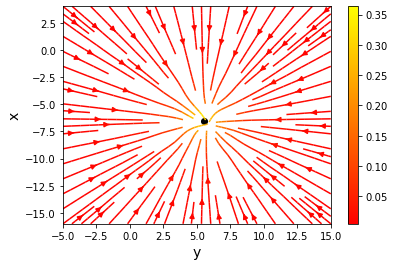

In [14]:
# 2D plot the field and the sources
fig = plt.figure()
ax = fig.gca()
#ax.scatter(sources[:,0], sources[:,1], marker='o', color='k')
ax.scatter(sources[:,1], sources[:,0], marker='o', color='k')
#ax.quiver(x, z, Ex, Ez, scale=10)
#strm = ax.streamplot(x, y, gx, gy, color=np.sqrt(gx*gx + gy*gy + gz*gz), cmap='autumn')
strm = ax.streamplot(y, x, gy, gx, color=np.sqrt(gx*gx + gy*gy + gz*gz), cmap='autumn')
fig.colorbar(strm.lines)
ax.set_xlabel('y', fontsize =14)
ax.set_ylabel('x', fontsize =14)
plt.show()

In [15]:
dgxdx, dgxdy, dgxdz, dgydx, dgydy, dgydz, dgzdx, dgzdy, dgzdz = derivatives_E(x,y,z,sources,mass)
divg = dgxdx + dgydy + dgzdz
curlg = np.array([dgzdy - dgydz, dgxdz - dgzdx, dgydx - dgxdy])
module_curlg = np.sqrt(curlg[0]**2 + curlg[1]**2 +curlg[2]**2)

maxgx = np.max(np.abs(gx))
maxgy = np.max(np.abs(gy))
maxgz = np.max(np.abs(gz))

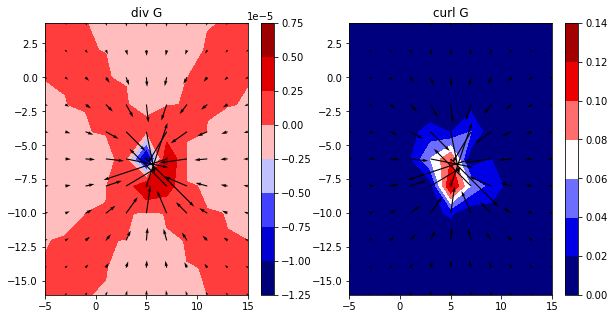

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('div G')
plt.contourf(y, x, divg,cmap='seismic')
plt.colorbar()
plt.quiver(y,x,gy,gx)

plt.subplot(1,2,2)
plt.title('curl G')
plt.contourf(y, x, module_curlg,cmap='seismic')
plt.colorbar()
plt.quiver(y,x,gy,gx)

plt.show()

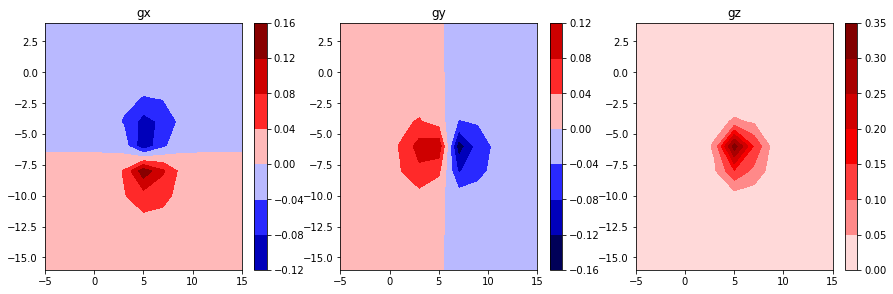

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.title('gx')
bound = np.max(np.abs(gx))
#plt.contourf(x, y, gx,cmap='seismic')
plt.contourf(y, x, gx,cmap='seismic', vmax = maxgx,vmin = -maxgx)
plt.colorbar()

plt.subplot(2,3,2)
plt.title('gy')
bound = np.max(np.abs(gz))
plt.contourf(y, x, gy,cmap='seismic', vmax = maxgy,vmin = -maxgy)
plt.colorbar()

plt.subplot(2,3,3)
plt.title('gz')
bound = np.max(np.abs(gz))
plt.contourf(y, x, gz,cmap='seismic', vmax = maxgz,vmin = -maxgz)
plt.colorbar()

### Electric monopole

Agora vamos considerar o campo elétrico:

$$ \mathbf E(x,y,z) = - k \frac{Q}{r²}\mathbf r  $$


$$ \mathbf E(x,y,z) = - k Q \left( -\frac{x-x_0}{r³},-\frac{y-y_0}{r³},-\frac{z-z_0}{r³} \right) $$

In [18]:
# sources
sources = np.array([[-6.8, 5.8, 0.8]])

In [19]:
# scalar physical property
Q = np.array([1])

In [20]:
# 2D grid of computation points
y, x = np.meshgrid(np.linspace(-5, 15, 11),
                   np.linspace(-16,  4, 11))


z = np.zeros_like(x) + 1

In [21]:
# compute the field components
Ex, Ey, Ez = E_field(x, y, z, sources, Q)

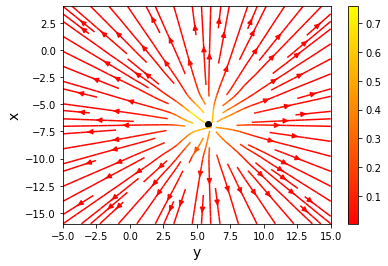

In [22]:
# 2D plot the field and the sources
fig = plt.figure()
ax = fig.gca()
ax.scatter(sources[:,1], sources[:,0], 
           marker='o', color='k')
#ax.quiver(x, z, Ex, Ez, scale=10)
strm = ax.streamplot(y, x, Ey, Ex, color=np.sqrt(Ex*Ex + Ey*Ey + Ez*Ez), cmap='autumn')
fig.colorbar(strm.lines)
ax.set_xlabel('y', fontsize =14)
ax.set_ylabel('x', fontsize =14)
plt.show()

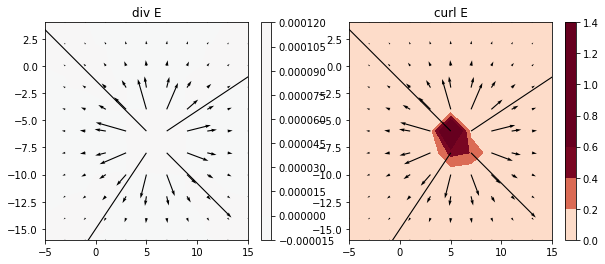

In [23]:
dExdx, dExdy, dExdz, dEydx, dEydy, dEydz, dEzdx, dEzdy, dEzdz = derivatives_E(x,y,z,sources,Q)
divE = dExdx + dEydy + dEzdz
curlE = np.array([dEzdy - dEydz, dExdz - dEzdx, dEydx - dExdy])
module_curlE = np.sqrt(curlE[0]**2 + curlE[1]**2 +curlE[2]**2)

maxex = np.max(np.abs(Ex))
maxey = np.max(np.abs(Ey))
maxez = np.max(np.abs(Ez))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('div E')
plt.contourf(y, x, divE,cmap='RdBu_r', vmax = maxex,vmin = -maxex)
plt.colorbar()
plt.quiver(y,x,Ey,Ex)

plt.subplot(1,2,2)
plt.title('curl E')
plt.contourf(y, x, module_curlE,cmap='RdBu_r', vmax = maxey,vmin = -maxey)
plt.colorbar()
plt.quiver(y,x,Ey,Ex)

plt.show()

### Duas fontes

In [24]:
# sources
sources = np.array([[-5.5, -1.5, 0.5],
                    [-5.5, 11.5, 0.5]])

In [25]:
# scalar physical property
Q = np.array([1,-1])

In [30]:
# 2D grid of computation points
y, x = np.meshgrid(np.linspace( -5, 15, 11),
                   np.linspace(-16,  4, 11))


z = np.zeros_like(y) + 1

In [31]:
# compute the field components
Ex, Ey, Ez =  E_field(x, y, z, sources, Q)

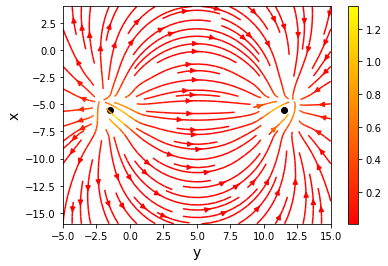

In [33]:
# 2D plot the field and the sources
fig = plt.figure()
ax = fig.gca()
ax.scatter(sources[:,1], sources[:,0], 
           marker='o', color='k')
#ax.quiver(x, z, Ex, Ez, scale=10)
strm = ax.streamplot(y, x, Ey, Ex, color=np.sqrt(Ex*Ex + Ey*Ey + Ez*Ez), cmap='autumn')
fig.colorbar(strm.lines)
ax.set_xlabel('y', fontsize =14)
ax.set_ylabel('x', fontsize =14)
plt.show()

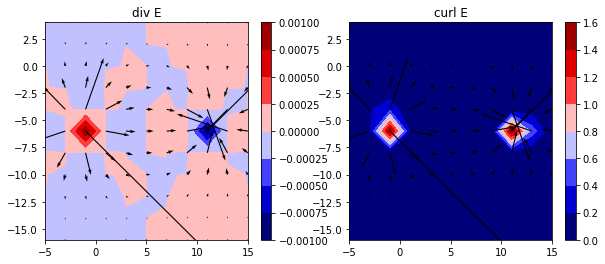

In [35]:
dExdx, dExdy, dExdz, dEydx, dEydy, dEydz, dEzdx, dEzdy, dEzdz = derivatives_E(x,y,z,sources,Q)
divE = dExdx + dEydy + dEzdz
curlE = np.array([dEzdy - dEydz, dExdz - dEzdx, dEydx - dExdy])
module_curlE = np.sqrt(curlE[0]**2 + curlE[1]**2 +curlE[2]**2)

maxex = np.max(np.abs(Ex))
maxey = np.max(np.abs(Ey))
maxez = np.max(np.abs(Ez))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('div E')
plt.contourf(y, x, divE, cmap='seismic')
plt.colorbar()
plt.quiver(y,x,Ey,Ex)

plt.subplot(1,2,2)
plt.title('curl E')
plt.contourf(y, x, module_curlE, cmap='seismic')
plt.colorbar()
plt.quiver(y,x,Ey,Ex)


plt.show()

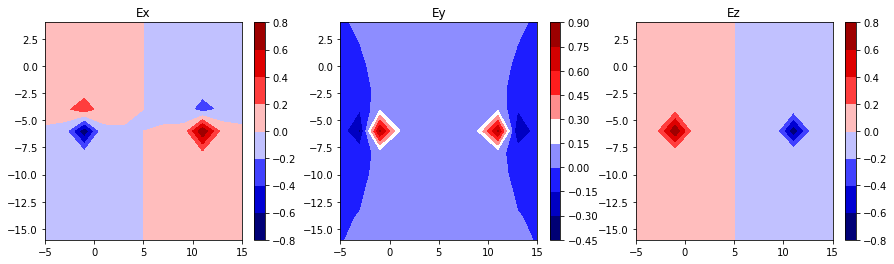

In [37]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.title('Ex')
bound = np.max(np.abs(Ex))
#plt.contourf(x, y, gx,cmap='seismic')
plt.contourf(y, x, Ex,cmap='seismic')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('Ey')
bound = np.max(np.abs(Ey))
plt.contourf(y, x, Ey,cmap='seismic')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('Ez')
bound = np.max(np.abs(Ez))
plt.contourf(y, x, Ez,cmap='seismic')
plt.colorbar()


plt.show()

### Magnetic dipole

$$ \mathbf B(x,y,z) = k_m \mathbf{T} \, \mathbf{m} $$

$$ \mathbf m = (m_x,m_y,m_z) $$

$$ 
\mathbf{T} =
\begin{bmatrix}
\frac{3(x-x_0)(x-x_0)}{r^5} - \frac{1}{r^3} & 
\frac{3(x-x_0)(y-y_0)}{r^5} &
\frac{3(x-x_0)(z-z_0)}{r^5} \\
\frac{3(x-x_0)(y-y_0)}{r^5} & 
\frac{3(y-y_0)(y-y_0)}{r^5} - \frac{1}{r^3} &
\frac{3(y-y_0)(z-z_0)}{r^5} \\
\frac{3(x-x_0)(z-z_0)}{r^5} &
\frac{3(y-y_0)(z-z_0)}{r^5} &
\frac{3(z-z_0)(z-z_0)}{r^5} - \frac{1}{r^3}
\end{bmatrix}
$$

$$ \mathbf B_{x}(x,y,z) = k_m 
\left[
m_{x} \left( \frac{3(x-x_0)(x-x_0)}{r^5} - \frac{1}{r^3} \right),
m_{y} \left( \frac{3(x-x_0)(y-y_0)}{r^5} \right),
m_{z} \left( \frac{3(x-x_0)(z-z_0)}{r^5} \right)
\right] $$

In [38]:
# sources
sources = np.array([[-5.5, -1.5, 2.5],
                   [-6.5, 11.5, 2.5]])

In [39]:
# vector physical property
moment = np.array([[1, 1, 0],
                  [2, 2, 0]])

In [40]:
# 2D grid of computation points
y, x = np.meshgrid(np.linspace(-5, 15, 11),
                   np.linspace(-16,  4, 11))


z = np.zeros_like(x) + 1

In [41]:
# compute the field components
Bx, By, Bz = B_field(x, y, z, sources, moment)

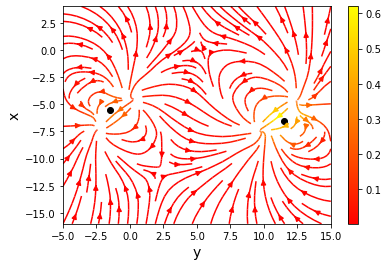

In [42]:
# 2D plot the field and the sources
fig = plt.figure()
ax = fig.gca()
ax.scatter(sources[:,1], sources[:,0], 
           marker='o', color='k')
#ax.quiver(x, z, Bx, Bz, scale=0.1)
strm = ax.streamplot(y, x, By, Bx, color=np.sqrt(Bx*Bx + By*By + Bz*Bz), cmap='autumn')
fig.colorbar(strm.lines)
ax.set_xlabel('y', fontsize =14)
ax.set_ylabel('x', fontsize =14)
plt.show()

In [43]:
dBxdx, dBxdy, dBxdz, dBydx, dBydy, dBydz, dBzdx, dBzdy, dBzdz = derivatives_B(x,y,z,sources,moment)
divB = dBxdx + dBydy + dBzdz
curlB = np.array([dBzdy - dBydz, dBxdz - dBzdx, dBydx - dBxdy])
module_curlB = np.sqrt(curlB[0]**2 + curlB[1]**2 + curlB[2]**2)

maxBx = np.max(np.abs(Bx))
maxBy = np.max(np.abs(By))
maxBz = np.max(np.abs(Bz))

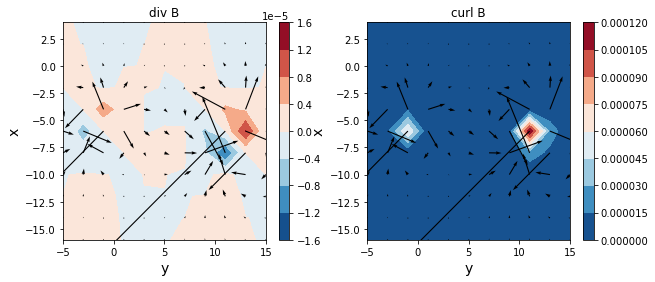

In [44]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('div B')
plt.contourf(y, x, divB,cmap='RdBu_r')
plt.xlabel('y', fontsize =14)
plt.ylabel('x', fontsize =14)
plt.colorbar()
plt.quiver(y,x,By,Bx)

plt.subplot(1,2,2)
plt.title('curl B')
plt.contourf(y, x, module_curlB,cmap='RdBu_r')
plt.xlabel('y', fontsize =14)
plt.ylabel('x', fontsize =14)
plt.colorbar()
plt.quiver(y,x,By,Bx)

plt.show()

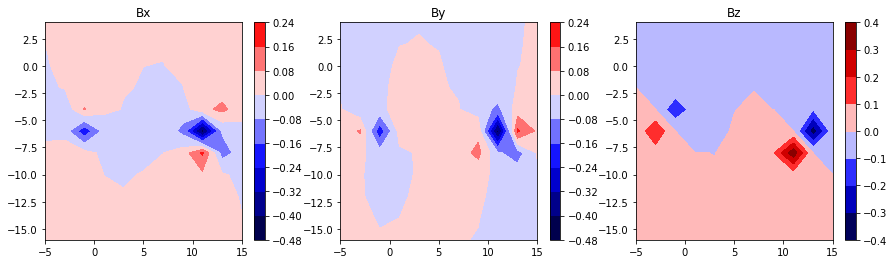

In [45]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.title('Bx')
#plt.contourf(x, y, gx,cmap='seismic')
plt.contourf(y, x, Bx,cmap='seismic', vmax = maxBx,vmin = -maxBx)
plt.colorbar()

plt.subplot(1,3,2)
plt.title('By')
bound = np.max(np.abs(By))
plt.contourf(y, x, By,cmap='seismic',vmax = maxBy,vmin = -maxBy)
plt.colorbar()

plt.subplot(1,3,3)
plt.title('Bz')
bound = np.max(np.abs(Bz))
plt.contourf(y, x, Bz,cmap='seismic',vmax = maxBz,vmin = -maxBz)
plt.colorbar()


plt.show()


### Gravity gradient tensor

In [46]:
# sources
sources = np.array([[-6.5, 5.5, 2.5]])

In [47]:
# scalar physical property
mass = np.array([1])

In [48]:
# 2D grid of computation points
y, x = np.meshgrid(np.linspace(-5, 15, 11),
                   np.linspace(-16,  4, 11))


z = np.zeros_like(x) + 1

In [49]:
gxx, gxy, gxz, gyy, gyz, gzz = Gradg_field(x,y,z,sources,mass)

In [50]:
gx, gy, gz = g_field(x, y, z, sources, mass)

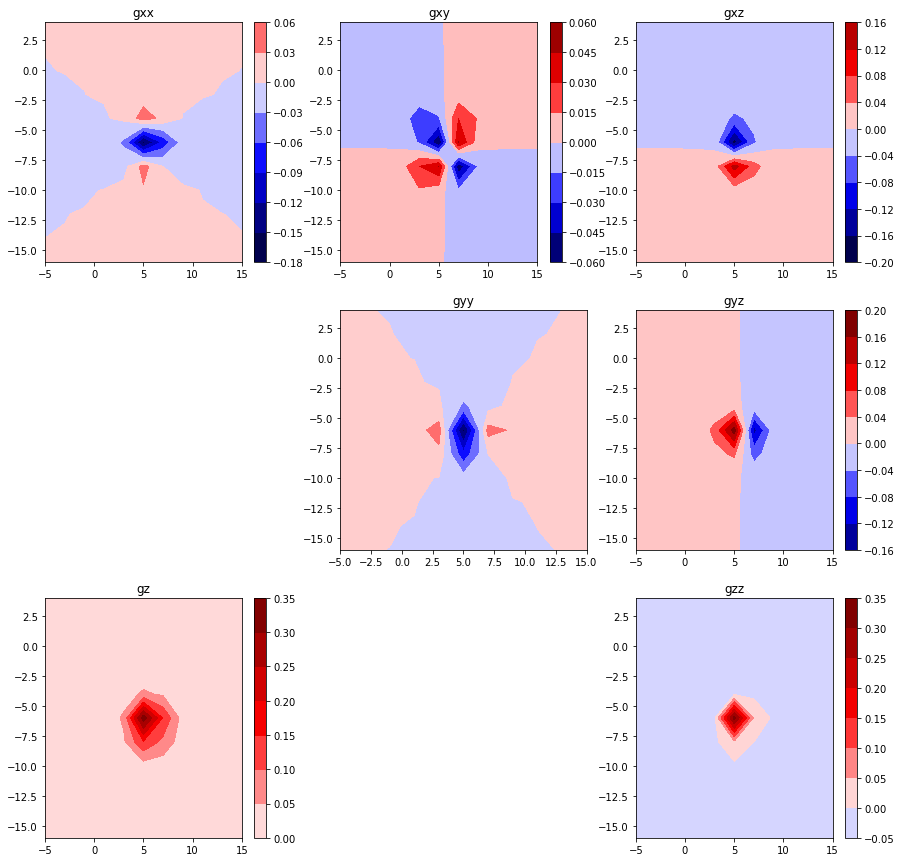

In [51]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.title('gxx')
bound = np.max(np.abs(gxx))
plt.contourf(y, x, gxx, vmin = -bound, vmax = bound, cmap='seismic')
plt.colorbar()

plt.subplot(3,3,2)
plt.title('gxy')
bound = np.max(np.abs(gxy))
plt.contourf(y, x, gxy, vmin = -bound, vmax = bound, cmap='seismic')
plt.colorbar()

plt.subplot(3,3,3)
plt.title('gxz')
bound = np.max(np.abs(gxz))
plt.contourf(y, x, gxz, vmin = -bound, vmax = bound, cmap='seismic')
plt.colorbar()

plt.subplot(3,3,5)
plt.title('gyy')
bound = np.max(np.abs(gyy))
plt.contourf(y, x, gyy, vmin = -bound, vmax = bound, cmap='seismic')
plt.colorbar

plt.subplot(3,3,6)
plt.title('gyz')
bound = np.max(np.abs(gyz))
plt.contourf(y, x, gyz, vmin = -bound, vmax = bound, cmap='seismic')
plt.colorbar()

plt.subplot(3,3,9)
plt.title('gzz')
bound = np.max(np.abs(gzz))
plt.contourf(y, x, gzz, vmin = -bound, vmax = bound, cmap='seismic')
plt.colorbar()

plt.subplot(3,3,7)
plt.title('gz')
bound = np.max(np.abs(gz))
plt.contourf(y, x, gz, vmin = -bound, vmax = bound, cmap='seismic')
plt.colorbar()

plt.show()